# Gráficos - Región Pampeana
## Importación y filtrado de encuesta

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  


In [2]:
from hogares import EncuestaHogares

encuesta = EncuestaHogares("usu_hogar_T324.xlsx", "usu_individual_T324.xlsx")
hogares, personas = encuesta.memoria()
hogares, personas = encuesta.filtrados_por_region(43, hogares, personas)
hogares_personas = encuesta.df_hogares_personas(hogares, personas)

## Análisis de Variables Individuales
### Ingreso 
Cuantitativa Continua

#### Problemas de la Variable de Ingresos en General
"Asimetría de la variable con presencia de valores extremos: las variables de ingreso son en todos los países variables asimétricas, caracterizadas por presentar muchos valores concentrados en la cola izquierda (valores bajos) de la distribución y pocos valores extremos
a la derecha.

Dificultad de determinar el carácter de los valores extremos y su tratamiento: las variables de ingreso son utilizadas para construir diferente indicadores: medias o medianas de ingreso, medidas de desigualdad, e.g coeficiente de Gini, ratios, estimaciones de
pobreza, etc.. Para cada uno de estos indicadores, hay varias formas de tratar los valores extremos:
- Asignarles ponderación igual a 1, suponiendo que son valores totalmente atípicos,
que no 'representan' a otros individuos.
- Modificar el valor de la variable ('trimming'), asignándole el primer valor inferior
considerado no 'extremo'.
- Eliminarlo del análisis, etc." [1]

#### Tratamiento de la no Respuesta en la Encuesta Permanente Hogares
"El método de imputación de ingresos utilizado es el de hot-deck aleatorio que sintéticamente, consiste en seleccionar un ‘donante’ para cada valor faltante dentro de cierta sub-población definida por ciertas variables auxiliares, correlacionadas o asociadas
con la variable cuya no respuesta se corrige. Ello significa que cada valor faltante es ‘imputado’ por un valor ‘válido’ que pertenece al mismo grupo de clasificación. La imputación se realiza sustituyendo el valor faltante por un valor válido en cada una de las
variables."

##### Referencias
1. https://www.santafe.gob.ar/index.php/web/content/download/80496/388462/file/eph_metodologia_15.pdf
2. https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/eph_innovaciones_12_09.pdf

#### Análisis de la Muestra


Se comienza por analizar los ingresos de las personas de la muestra de la region pampeana. Se consideran sólo los valores distintos de -9 (no respuesta).
La muestra queda reducida a 11904 personas.

El coeficiente de dispersión mayor al 100% refleja la problemática antes descripta de la variable de ingresos. Es una variable con válores atípicos y sesgo a la derecha.

In [18]:
print("Coeficiente de dispersión:", (hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]].std()/hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]].mean()).values)
print("Media:", hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]].mean().values)
print("Mediana:", hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]].median().values)
print("Personas con ingresos", len(hogares_personas[hogares_personas["ingreso"] !=-9]))

Coeficiente de dispersión: [1.466848]
Media: [355297.28883842]
Mediana: [200000.]
Personas con ingresos 11904


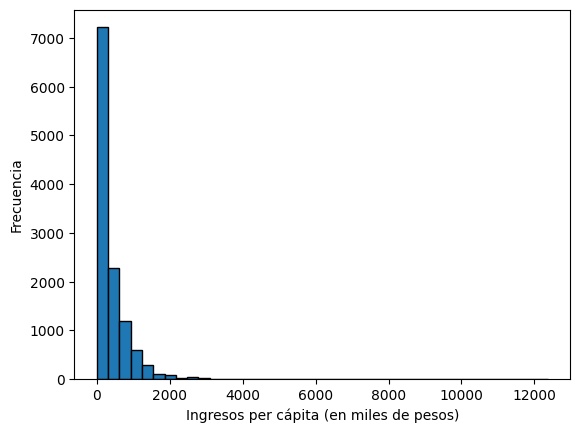

In [20]:
respuestas = hogares_personas[hogares_personas["ingreso"] !=-9][["ingreso"]]/1000
plt.hist(respuestas["ingreso"], bins=40, edgecolor='black')
plt.xlabel("Ingresos per cápita (en miles de pesos)")
plt.ylabel("Frecuencia")
plt.show()

Se toman sólo los valores hasta $4,000,000 para tener una  mejor visualización.

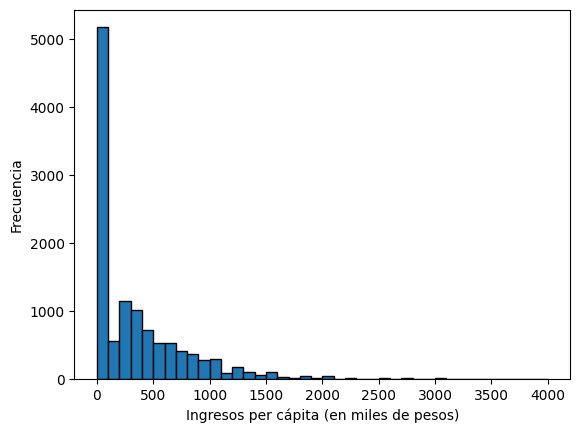

In [24]:
respuestas = hogares_personas[(hogares_personas["ingreso"] !=-9) & (hogares_personas["ingreso"] <=4000000)][["ingreso"]]/1000
plt.hist(respuestas["ingreso"], bins=40, edgecolor='black')
plt.xlabel("Ingresos per cápita (en miles de pesos)")
plt.ylabel("Frecuencia")
plt.show()

Se observan los aglomerados presentes en la muestra de la región pampeana.

In [8]:
hogares_personas[["AGLOMERADO_x"]].value_counts().reset_index(name='CANTIDAD_AGLOMERADO')

,AGLOMERADO_x,CANTIDAD_AGLOMERADO
0,13,1964
1,4,1647
2,38,1403
3,6,1390
4,5,1362
5,14,1352
6,2,1261
7,36,1079
8,3,1012
9,34,925


In [15]:
aglomerados = pd.DataFrame([(2, "Gran La Plata"),
               (3, "Bahía Blanca - Cerri"),
               (4, "Gran Rosario"),
               (5, "Gran Santa Fé"),
               (6, "Gran Paraná"),
               (7, "Posadas"),
               (8, "Gran Resistencia"),
               (9, "Comodoro Rivadavia - Rada Tilly"),
               (10, "Gran Mendoza"),
               (12, "Corrientes"),
               (13, "Gran Córdoba"),
               (14, "Concordia"),
               (15, "Formosa"),
               (17, "Neuquén – Plottier"),
               (18, "Santiago del Estero - La Banda"),
               (19, "Jujuy - Palpalá"),
               (20, "Río Gallegos"),
               (22, "Gran Catamarca"),
               (23, "Gran Salta"),
               (25, "La Rioja"),
               (26, "Gran San Luis"),
               (27, "Gran San Juan"),
               (29, "Gran Tucumán - Tafí Viejo"),
               (30, "Santa Rosa – Toay"),
               (31, "Ushuaia - Río Grande"),
               (32, "Ciudad Autónoma de Buenos Aires"),
               (33, "Partidos del GBA"),
               (34, "Mar del Plata"),
               (36, "Río Cuarto"),
               (38, "San Nicolás – Villa Constitución"),
               (91, "Rawson – Trelew"),
               (93, "Viedma – Carmen de Patagones")], columns=["AGLOMERADO", "AGLOMERADO_NOMBRE"])